# 3. Transformacion de datos

In [1]:
import pandas as pd
import numpy as np
"""graficas"""
import matplotlib.pyplot as plt
import seaborn as sns
"""transformaciones a las columnas de una matriz de datos"""
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

## 3.1 Analizar muestras

In [2]:
"""importar datos"""
df_normal = pd.read_csv('../../araData/Z/normal_2cat.csv',low_memory=False)
df_dos = pd.read_csv('../../araData/Z/dos_2cat.csv',low_memory=False)
df_probe = pd.read_csv('../../araData/Z/probe_2cat.csv',low_memory=False)

In [3]:
"""concatenar datos"""
df_traffic = pd.concat([df_dos, df_normal, df_probe], axis=0)
"""sumar clases"""
cantidad = df_traffic['Label'].value_counts().rename_axis('Trafico').reset_index(name='Flujos')

'sumar clases'

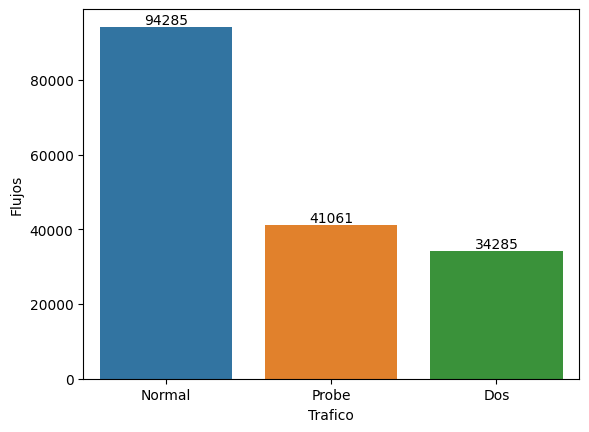

In [12]:
ax = sns.barplot(x='Trafico', y='Flujos', data=cantidad)
ax.bar_label(ax.containers[0])
plt.savefig('cantidad_clasestrafico.png')


In [ ]:
df_traffic.loc[:, df_traffic.dtypes == 'object'] = df_traffic.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [5]:
df_traffic.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169631 entries, 0 to 41060
Data columns (total 49 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   RunTime     169631 non-null  float64 
 1   Dur         169631 non-null  float64 
 2   SrcDur      169631 non-null  float64 
 3   DstDur      169631 non-null  float64 
 4   Mean        169631 non-null  float64 
 5   StdDev      169631 non-null  float64 
 6   Sum         169631 non-null  float64 
 7   Min         169631 non-null  float64 
 8   Max         169631 non-null  float64 
 9   Proto       169631 non-null  category
 10  Dport       169631 non-null  int64   
 11  TotPkts     169631 non-null  int64   
 12  SrcPkts     169631 non-null  int64   
 13  DstPkts     169631 non-null  int64   
 14  TotBytes    169631 non-null  int64   
 15  SrcBytes    169631 non-null  int64   
 16  DstBytes    169631 non-null  int64   
 17  TotAppByte  169631 non-null  int64   
 18  SAppBytes   169631 non-nu

In [6]:
df_traffic.describe()

,RunTime,Dur,SrcDur,DstDur,Mean,StdDev,Sum,Min,Max,Dport,...,TcpRtt,SynAck,AckDat,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz
count,169631.000000,169631.000000,169631.000000,169631.000000,169631.000000,169631.0,169631.000000,169631.000000,169631.000000,169631.000000,...,169631.000000,169631.000000,169631.000000,1.696310e+05,169631.000000,169631.000000,169631.000000,169631.000000,169631.000000,169631.000000
mean,2.443665,2.443665,2.430197,2.145518,2.443665,0.0,2.443665,2.443665,2.443665,2830.834447,...,0.008346,0.004271,0.004075,2.413164e+06,126.283888,302.835647,441.761494,1043.655729,65.597249,139.448391
std,5.288742,5.288742,5.277424,5.163470,5.288742,0.0,5.288742,5.288742,5.288742,8439.065138,...,0.051548,0.049648,0.015051,2.411302e+06,191.045259,576.902879,1267.661879,4660.406138,16.281150,141.509002
min,0.000002,0.000002,0.000000,0.000000,0.000002,0.0,0.000002,0.000002,0.000002,1.000000,...,0.000000,0.000000,0.000000,1.280000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003184,0.003184,0.000000,0.000000,0.003184,0.0,0.003184,0.003184,0.003184,53.000000,...,0.000000,0.000000,0.000000,6.335420e+05,64.333336,58.000000,71.000000,58.000000,54.000000,54.000000
50%,0.007470,0.007470,0.000000,0.000000,0.007470,0.0,0.007470,0.007470,0.007470,80.000000,...,0.000000,0.000000,0.000000,1.619216e+06,75.000000,186.000000,81.000000,311.000000,66.000000,60.000000
75%,1.038991,1.038991,1.018632,0.058970,1.038991,0.0,1.038991,1.038991,1.038991,749.000000,...,0.006275,0.000009,0.000050,3.389938e+06,107.500000,382.666656,336.000000,543.000000,74.000000,186.000000
max,19.999998,19.999998,19.999998,19.999998,19.999998,0.0,19.999998,19.999998,19.999998,65389.000000,...,7.028434,7.028434,1.232833,1.042765e+07,4577.167480,47301.550781,65226.000000,65226.000000,1048.000000,1739.000000


## 3.2 Datos Categoricos (parte 2)

In [8]:
df_traffic.Proto.unique()

['tcp', 'udp']
Categories (2, object): ['tcp', 'udp']

In [7]:
df_traffic.Label.unique()

['Dos', 'Normal', 'Probe']
Categories (3, object): ['Dos', 'Normal', 'Probe']

In [9]:
"""CREAR ETIQUETAS NUMERICAS de variable dependiente"""
labelcode = LabelEncoder()
df_traffic['Proto']= labelcode.fit_transform(df_traffic['Proto'])
df_traffic['Label']= labelcode.fit_transform(df_traffic['Label'])
print('\n\nEtiquetas numericas de la variable dependiente y: \n\n', df_traffic['Label'])
print('\n\nEtiquetas numericas de la variable independiente x: \n\n', df_traffic['Proto'])



Etiquetas numericas de la variable dependiente y: 

 0        0
1        0
2        0
3        0
4        0
        ..
41056    2
41057    2
41058    2
41059    2
41060    2
Name: Label, Length: 169631, dtype: int32


Etiquetas numericas de la variable independiente x: 

 0        0
1        0
2        0
3        0
4        0
        ..
41056    0
41057    0
41058    0
41059    0
41060    1
Name: Proto, Length: 169631, dtype: int32


In [10]:
X = df_traffic.iloc[:,0:48]
y = df_traffic.iloc[:,48]

## 3.2 Reduccion de caracteristicas

Sin Normalizar

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.03362397 0.02810011 0.03514368 0.05616317 0.02175877 0.
 0.03039664 0.03043417 0.0330506  0.16383259 0.07883605 0.02447012
 0.01672431 0.02753942 0.01059178 0.01048473 0.02059184 0.01073843
 0.01624238 0.01094828 0.00470601 0.00234346 0.00222926 0.00479168
 0.00813873 0.00026044 0.01271607 0.01530977 0.00050851 0.
 0.         0.         0.         0.         0.         0.00597358
 0.00389068 0.00353364 0.00626649 0.00222207 0.03114292 0.07916843
 0.01667265 0.0200535  0.0130699  0.0222513  0.0184584  0.06662143]


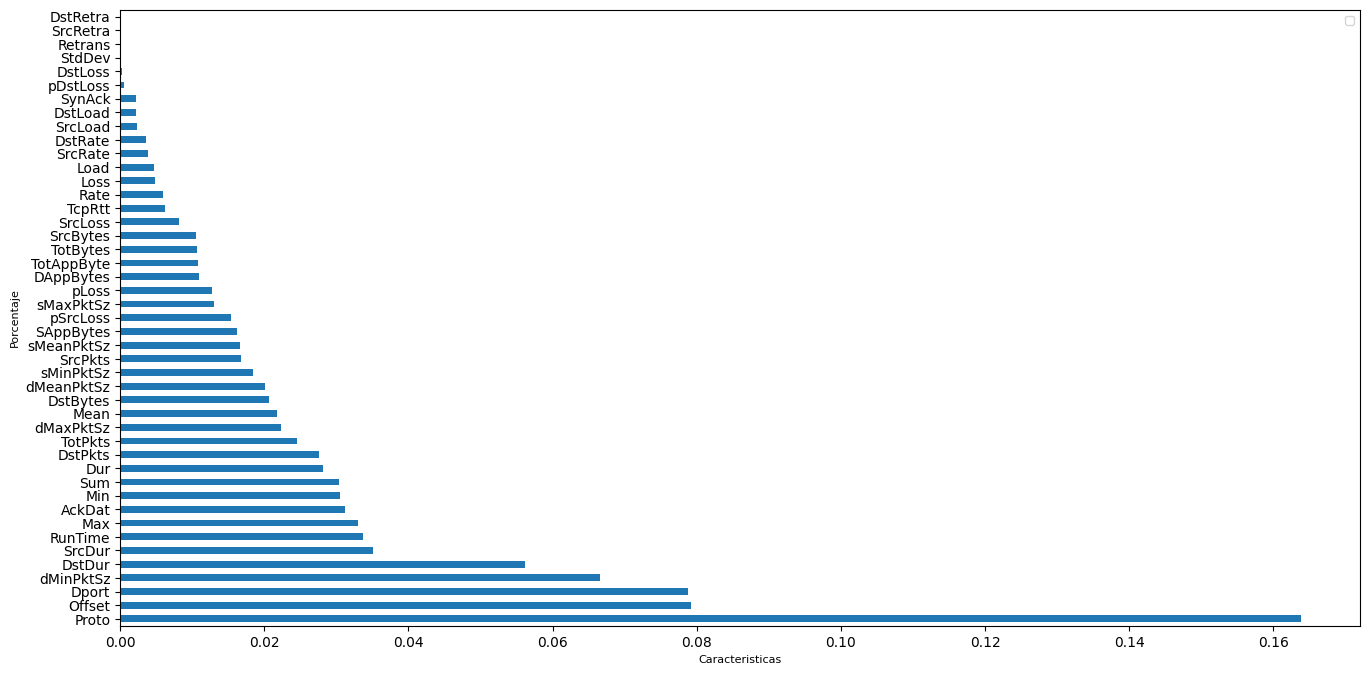

<Figure size 640x480 with 0 Axes>

In [11]:
m_extract_features = ExtraTreesClassifier()
m_extract_features.fit(X,y)
plt.figure(figsize=(16,8))
print(m_extract_features.feature_importances_)
feat_importances = pd.Series(m_extract_features.feature_importances_, index=X.columns)
feat_importances.nlargest(45).plot(kind='barh')
plt.xlabel('Caracteristicas', fontsize = 8)
plt.ylabel('Porcentaje', fontsize = 8)
plt.legend(fontsize="small")
plt.show()
plt.savefig('ExtraTreesClassifier.png')

Normalizado

In [ ]:
def plotStandarization():
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24, 7))
    # let's compare the variable distributions before and after scaling

    for (label, content) in X.iteritems():
        ax1.set_title('Before Scaling')
        sns.kdeplot(X[label], ax=ax1, label=label)
        leg = ax1.legend(loc="upper left", bbox_to_anchor=[0, 1],
                     ncol=2, shadow=True, title="Legend", fancybox=True)
    
    for (label, content) in X_scaled.iteritems():
        ax2.set_title('After Mean Normalisation')
        sns.kdeplot(X_scaled[label], ax=ax2, label=label)
        leg = ax2.legend(loc="upper left", bbox_to_anchor=[0, 1],
                     ncol=2, shadow=True, title="Legend", fancybox=True)

    plt.show() 